# Adversarial Attacks: CNN and GLRT under FGSM/PGD (L∞ and L2)

In [ ]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adversarial_attacks import evaluate_attack_across_epsilons
from preprocessing import load_and_preprocess_data
from cnn import load_model

## Load Data and Model

In [2]:
# Load data
X_train, X_test, y_train, y_test, signal2_start_times = load_and_preprocess_data(
    filepath='../data/original/processed_signals.mat'
)

# Load trained CNN model
model = load_model('cnn', load_dir='../models/noattack')

Model loaded from ../models/noattack/cnn.h5


In [3]:
df_glrt_accuracy = pd.read_csv("../results/noattack/glrt_accuracy.csv")

# Extract the threshold value
threshold = df_glrt_accuracy["glrt_threshold"].iloc[0]

# Wrap it for input to the attack evaluation function
glrt_threshold = {"GLRT_95": threshold}

print(f"Loaded GLRT threshold: {threshold}")

Loaded GLRT threshold: 13.293898240143388


## Define Perturbation Epsilon Values

In [4]:
epsilon_values_inf = np.linspace(0.0, 0.005, 20)
epsilon_values_2norm = np.linspace(0.0, 0.15, 20)

## Run Adversarial Attacks

### FGSM - L inf

In [5]:
cnn_fgsm_inf, glrt_fgsm_inf, cnn_preds_fgsm_inf, glrt_preds_fgsm_inf = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_inf,
    glrt_threshold=threshold,
    attack_type='fgsm',
    norm='inf'
)

[FGSM-inf] Epsilon = 0.00000
[FGSM-inf] Epsilon = 0.00026
[FGSM-inf] Epsilon = 0.00053
[FGSM-inf] Epsilon = 0.00079
[FGSM-inf] Epsilon = 0.00105
[FGSM-inf] Epsilon = 0.00132
[FGSM-inf] Epsilon = 0.00158
[FGSM-inf] Epsilon = 0.00184
[FGSM-inf] Epsilon = 0.00211
[FGSM-inf] Epsilon = 0.00237
[FGSM-inf] Epsilon = 0.00263
[FGSM-inf] Epsilon = 0.00289
[FGSM-inf] Epsilon = 0.00316
[FGSM-inf] Epsilon = 0.00342
[FGSM-inf] Epsilon = 0.00368
[FGSM-inf] Epsilon = 0.00395
[FGSM-inf] Epsilon = 0.00421
[FGSM-inf] Epsilon = 0.00447
[FGSM-inf] Epsilon = 0.00474
[FGSM-inf] Epsilon = 0.00500


In [6]:
df_fgsm_inf = pd.DataFrame({
    "epsilon": epsilon_values_inf,
    "cnn_accuracy": cnn_fgsm_inf,
    "glrt_accuracy": glrt_fgsm_inf
})
df_fgsm_inf.head()

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.979000,0.919000
1,0.000263,0.954833,0.918167
2,0.000526,0.903000,0.913833
3,0.000789,0.823333,0.905667
4,0.001053,0.728000,0.892500


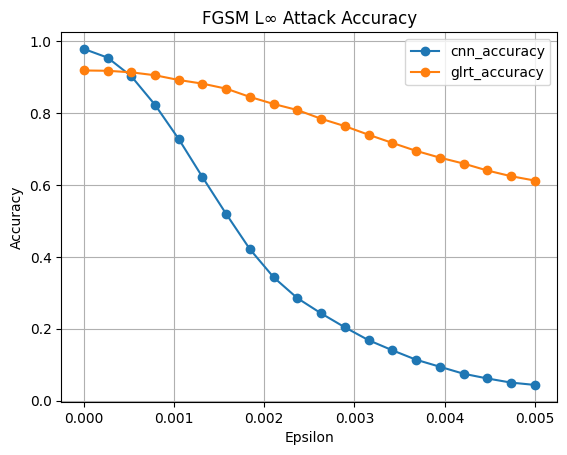

In [7]:
df_fgsm_inf.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("FGSM L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [40]:
df_fgsm_inf.to_csv("../results/attacks/fgsm_inf_accuracy.csv")

In [36]:
cnn_pred_df = pd.DataFrame(cnn_preds_fgsm_inf).T
glrt_pred_df = pd.DataFrame(glrt_preds_fgsm_inf).T
cnn_pred_df.to_csv("../results/attacks/fgsm_inf_cnn_predictions.csv")
glrt_pred_df.to_csv("../results/attacks/fgsm_inf_glrt_predictions.csv")

### FGSM - L2

In [12]:
# FGSM - L2
cnn_fgsm_l2, glrt_fgsm_l2, cnn_preds_fgsm_l2, glrt_preds_fgsm_l2 = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_2norm,
    glrt_threshold=threshold,
    attack_type='fgsm',
    norm='2'
)

[FGSM-2] Epsilon = 0.00000
[FGSM-2] Epsilon = 0.00789
[FGSM-2] Epsilon = 0.01579
[FGSM-2] Epsilon = 0.02368
[FGSM-2] Epsilon = 0.03158
[FGSM-2] Epsilon = 0.03947
[FGSM-2] Epsilon = 0.04737
[FGSM-2] Epsilon = 0.05526
[FGSM-2] Epsilon = 0.06316
[FGSM-2] Epsilon = 0.07105
[FGSM-2] Epsilon = 0.07895
[FGSM-2] Epsilon = 0.08684
[FGSM-2] Epsilon = 0.09474
[FGSM-2] Epsilon = 0.10263
[FGSM-2] Epsilon = 0.11053
[FGSM-2] Epsilon = 0.11842
[FGSM-2] Epsilon = 0.12632
[FGSM-2] Epsilon = 0.13421
[FGSM-2] Epsilon = 0.14211
[FGSM-2] Epsilon = 0.15000


In [37]:
df_fgsm_l2 = pd.DataFrame({
    "epsilon": epsilon_values_2norm,
    "cnn_accuracy": cnn_fgsm_l2,
    "glrt_accuracy": glrt_fgsm_l2
})
df_fgsm_l2.head()

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.979000,0.919000
1,0.007895,0.965500,0.918333
2,0.015789,0.944000,0.918167
3,0.023684,0.911833,0.921333
4,0.031579,0.866500,0.924000


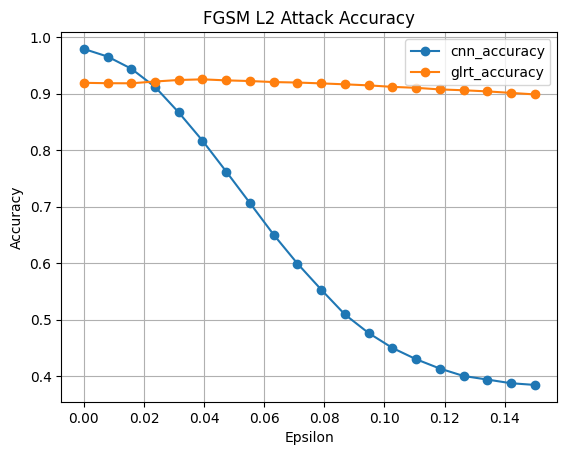

In [45]:
df_fgsm_l2.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("FGSM L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [41]:
df_fgsm_l2.to_csv("../results/attacks/fgsm_l2_accuracy.csv")

In [39]:
df_cnn_preds_fgsm_l2 = pd.DataFrame(cnn_preds_fgsm_l2).T
df_glrt_preds_fgsm_l2 = pd.DataFrame(glrt_preds_fgsm_l2).T
df_cnn_preds_fgsm_l2.to_csv("../results/attacks/fgsm_l2_cnn_predictions.csv")
df_glrt_preds_fgsm_l2.to_csv("../results/attacks/fgsm_l2_glrt_predictions.csv")

### PGD - L inf

In [42]:
# PGD - Linf
cnn_pgd_inf, glrt_pgd_inf, cnn_preds_pgd_inf, glrt_preds_pgd_inf = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_inf,
    glrt_threshold=threshold,
    attack_type='pgd',
    norm='inf'
)

[PGD-inf] Epsilon = 0.00000
[PGD-inf] Epsilon = 0.00026
[PGD-inf] Epsilon = 0.00053
[PGD-inf] Epsilon = 0.00079
[PGD-inf] Epsilon = 0.00105
[PGD-inf] Epsilon = 0.00132
[PGD-inf] Epsilon = 0.00158
[PGD-inf] Epsilon = 0.00184
[PGD-inf] Epsilon = 0.00211
[PGD-inf] Epsilon = 0.00237
[PGD-inf] Epsilon = 0.00263
[PGD-inf] Epsilon = 0.00289
[PGD-inf] Epsilon = 0.00316
[PGD-inf] Epsilon = 0.00342
[PGD-inf] Epsilon = 0.00368
[PGD-inf] Epsilon = 0.00395
[PGD-inf] Epsilon = 0.00421
[PGD-inf] Epsilon = 0.00447
[PGD-inf] Epsilon = 0.00474
[PGD-inf] Epsilon = 0.00500


In [43]:
df_pgd_inf = pd.DataFrame({
    "epsilon": epsilon_values_inf,
    "cnn_accuracy": cnn_pgd_inf,
    "glrt_accuracy": glrt_pgd_inf
})
df_pgd_inf.head()

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.979000,0.919000
1,0.000263,0.954333,0.918667
2,0.000526,0.896833,0.914833
3,0.000789,0.801333,0.908833
4,0.001053,0.680000,0.902833


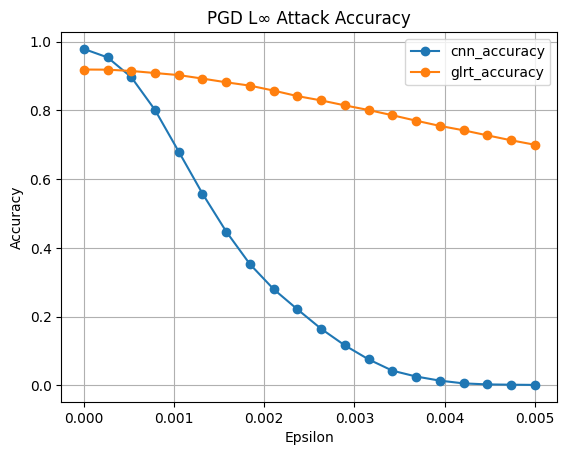

In [51]:
df_pgd_inf.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("PGD L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [46]:
df_pgd_inf.to_csv("../results/attacks/pgd_inf_accuracy.csv")

In [47]:
df_cnn_preds_pgd_inf = pd.DataFrame(cnn_preds_pgd_inf).T
df_glrt_preds_pgd_inf = pd.DataFrame(glrt_preds_pgd_inf).T
df_cnn_preds_pgd_inf.to_csv("../results/attacks/pgd_inf_cnn_predictions.csv")
df_glrt_preds_pgd_inf.to_csv("../results/attacks/pgd_inf_glrt_predictions.csv")

### PGD - L2

In [48]:
# PGD - L2
cnn_pgd_l2, glrt_pgd_l2, cnn_preds_pgd_l2, glrt_preds_pgd_l2 = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_2norm,
    glrt_threshold=threshold,
    attack_type='pgd',
    norm='2'
)

[PGD-2] Epsilon = 0.00000
[PGD-2] Epsilon = 0.00789
[PGD-2] Epsilon = 0.01579
[PGD-2] Epsilon = 0.02368
[PGD-2] Epsilon = 0.03158
[PGD-2] Epsilon = 0.03947
[PGD-2] Epsilon = 0.04737
[PGD-2] Epsilon = 0.05526
[PGD-2] Epsilon = 0.06316
[PGD-2] Epsilon = 0.07105
[PGD-2] Epsilon = 0.07895
[PGD-2] Epsilon = 0.08684
[PGD-2] Epsilon = 0.09474
[PGD-2] Epsilon = 0.10263
[PGD-2] Epsilon = 0.11053
[PGD-2] Epsilon = 0.11842
[PGD-2] Epsilon = 0.12632
[PGD-2] Epsilon = 0.13421
[PGD-2] Epsilon = 0.14211
[PGD-2] Epsilon = 0.15000


In [49]:
df_pgd_l2 = pd.DataFrame({
    "epsilon": epsilon_values_2norm,
    "cnn_accuracy": cnn_pgd_l2,
    "glrt_accuracy": glrt_pgd_l2
})
df_pgd_l2.head()

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.979000,0.919000
1,0.007895,0.965333,0.918833
2,0.015789,0.942167,0.919167
3,0.023684,0.905333,0.922333
4,0.031579,0.853000,0.924333


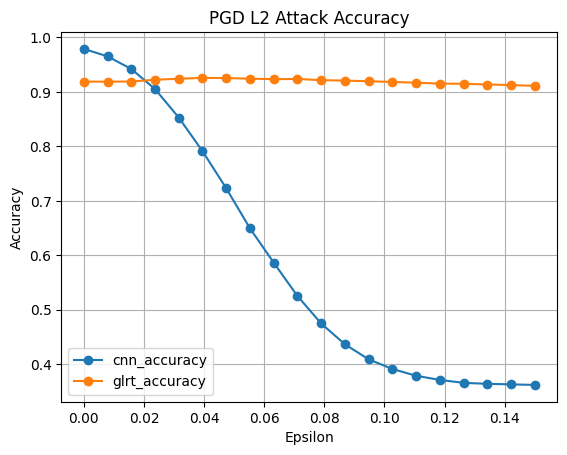

In [50]:
df_pgd_l2.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("PGD L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [52]:
df_pgd_l2.to_csv("../results/attacks/pgd_l2_accuracy.csv")

In [53]:
df_cnn_preds_pgd_l2 = pd.DataFrame(cnn_preds_pgd_l2).T
df_glrt_preds_pgd_l2 = pd.DataFrame(glrt_preds_pgd_l2).T
df_cnn_preds_pgd_l2.to_csv("../results/attacks/pgd_l2_cnn_predictions.csv")
df_glrt_preds_pgd_l2.to_csv("../results/attacks/pgd_l2_glrt_predictions.csv")